## Load and Analyze Simulation Results
This section loads the simulation results from the generated CSV file, visualizes the data, and prints key metrics.

# Advanced Market Simulation
This notebook demonstrates the implementation of advanced market simulation models, including mean-reverting processes, jump diffusion models, and stochastic volatility models.

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

## Mean-Reverting Process: Ornstein-Uhlenbeck
The Ornstein-Uhlenbeck process models mean-reverting price dynamics. It is defined as:

$$ dX_t = \theta(\mu - X_t)dt + \sigma dW_t $$

Where:
- $\theta$ is the rate of mean reversion.
- $\mu$ is the long-term mean.
- $\sigma$ is the volatility.
- $dW_t$ is a Wiener process.

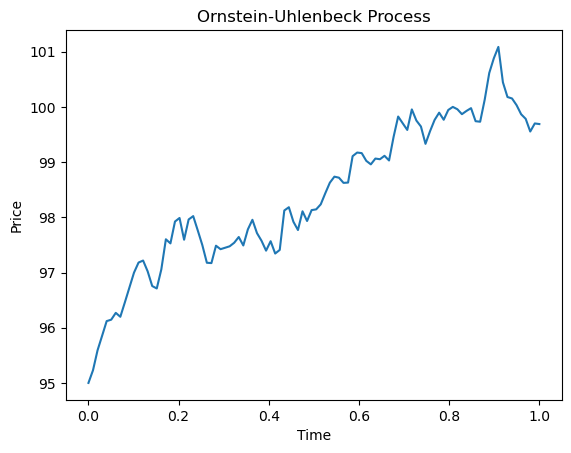

In [2]:
# Ornstein-Uhlenbeck Process Implementation
def ornstein_uhlenbeck_process(theta, mu, sigma, X0, T, dt):
    n = int(T / dt)
    X = np.zeros(n)
    X[0] = X0
    for t in range(1, n):
        dW = np.random.normal(0, np.sqrt(dt))
        X[t] = X[t-1] + theta * (mu - X[t-1]) * dt + sigma * dW
    return X

# Parameters
theta = 0.7
mu = 100
sigma = 2
X0 = 95
T = 1.0
dt = 0.01

# Simulate and Plot
ou_process = ornstein_uhlenbeck_process(theta, mu, sigma, X0, T, dt)
time = np.linspace(0, T, int(T / dt))
plt.plot(time, ou_process)
plt.title("Ornstein-Uhlenbeck Process")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

## Jump Diffusion Model
The jump diffusion model introduces sudden price jumps to mimic real-world market shocks. It is defined as:

$$ dX_t = \mu dt + \sigma dW_t + J_t dN_t $$

Where:
- $\mu$ is the drift.
- $\sigma$ is the volatility.
- $dW_t$ is a Wiener process.
- $J_t$ is the jump size.
- $dN_t$ is a Poisson process.

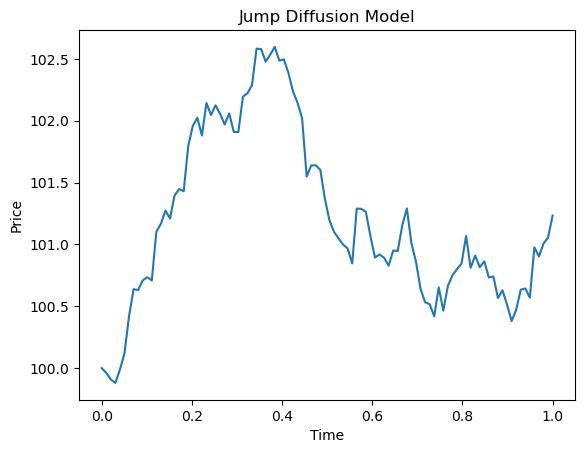

In [3]:
# Jump Diffusion Model Implementation
def jump_diffusion_model(mu, sigma, lambda_, jump_mean, jump_std, X0, T, dt):
    n = int(T / dt)
    X = np.zeros(n)
    X[0] = X0
    for t in range(1, n):
        dW = np.random.normal(0, np.sqrt(dt))
        dN = np.random.poisson(lambda_ * dt)
        J = np.random.normal(jump_mean, jump_std) if dN > 0 else 0
        X[t] = X[t-1] + mu * dt + sigma * dW + J
    return X

# Parameters
mu = 0.1
sigma = 1.5
lambda_ = 0.5
jump_mean = 5
jump_std = 2
X0 = 100
T = 1.0
dt = 0.01

# Simulate and Plot
jump_diffusion = jump_diffusion_model(mu, sigma, lambda_, jump_mean, jump_std, X0, T, dt)
time = np.linspace(0, T, int(T / dt))
plt.plot(time, jump_diffusion)
plt.title("Jump Diffusion Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

## Stochastic Volatility Model: Heston
The Heston model simulates time-varying volatility. It is defined as:

$$ dX_t = \mu X_t dt + \sqrt{V_t} X_t dW_t $$
$$ dV_t = \kappa(\theta - V_t)dt + \xi \sqrt{V_t} dZ_t $$

Where:
- $\mu$ is the drift.
- $V_t$ is the variance.
- $\kappa$ is the rate of mean reversion for variance.
- $\theta$ is the long-term variance.
- $\xi$ is the volatility of variance.
- $dW_t$ and $dZ_t$ are Wiener processes.

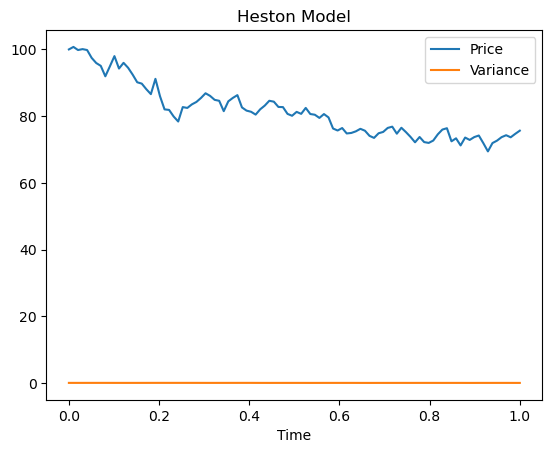

In [4]:
# Heston Model Implementation
def heston_model(mu, kappa, theta, xi, V0, X0, T, dt):
    n = int(T / dt)
    X = np.zeros(n)
    V = np.zeros(n)
    X[0] = X0
    V[0] = V0
    for t in range(1, n):
        dW = np.random.normal(0, np.sqrt(dt))
        dZ = np.random.normal(0, np.sqrt(dt))
        V[t] = max(V[t-1] + kappa * (theta - V[t-1]) * dt + xi * np.sqrt(V[t-1]) * dZ, 0)
        X[t] = X[t-1] + mu * X[t-1] * dt + np.sqrt(V[t]) * X[t-1] * dW
    return X, V

# Parameters
mu = 0.05
kappa = 2.0
theta = 0.04
xi = 0.1
V0 = 0.04
X0 = 100
T = 1.0
dt = 0.01

# Simulate and Plot
heston_prices, heston_vols = heston_model(mu, kappa, theta, xi, V0, X0, T, dt)
time = np.linspace(0, T, int(T / dt))
plt.plot(time, heston_prices, label="Price")
plt.plot(time, heston_vols, label="Variance")
plt.title("Heston Model")
plt.xlabel("Time")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV Data
results = pd.read_csv("../src/simulation_results.csv")

# Plot Ornstein-Uhlenbeck Process
plt.figure(figsize=(10, 6))
plt.plot(results["Time"], results["OU_Process"], label="Ornstein-Uhlenbeck Process")
plt.title("Ornstein-Uhlenbeck Process")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot Jump Diffusion Model
plt.figure(figsize=(10, 6))
plt.plot(results["Time"], results["Jump_Diffusion"], label="Jump Diffusion Model")
plt.title("Jump Diffusion Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Print Risk-Adjusted Metrics
print("Risk-Adjusted Metrics:")
print(f"Sharpe Ratio: {results['Sharpe_Ratio'].iloc[0]}")
print(f"Sortino Ratio: {results['Sortino_Ratio'].iloc[0]}")